Vamos ahora a tomar de nuevo el conjunto de datos con el que estuvimos trabajando en los últimos días y vamos a continuar con el análisis de las estadísitcas de los contenidos del conjunto de datos.

Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

Objetivos
Los objetivos de hoy son:


1. Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:
 * Tabla de contingencia


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st

In [4]:
df = pd.read_csv('ds_salaries.csv', index_col = 0)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
# Elegimos hacer la tabla de contigencia de las variables job_title y salary
crosstab = pd.crosstab(df['job_title'], df['salary'])
crosstab

salary,4000,8000,8760,9272,10000,12000,13400,14000,18000,19000,...,2500000,3000000,4000000,4450000,4900000,6000000,7000000,8500000,11000000,30400000
job_title,,,,,,,,,,,,,,,,,,,,,
3D Computer Vision Researcher,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AI Scientist,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Analytics Engineer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Applied Data Scientist,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Applied Machine Learning Scientist,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BI Data Analyst,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Big Data Architect,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Big Data Engineer,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Business Data Analyst,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# como es muy larga la lista de salarios, vamos a cortarlos por intervalos
# para ello, añadimos al df una columna con los cortes hechos por bins

df['intervalos_salario'] = pd.cut(df['salary'], bins = (3900, 12000, 40000, 80000, 160000, 320000, 640000, 800000, 1500000, 2500000, 3500000, 30500000))
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,intervalos_salario
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,"(40000, 80000]"
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,"(160000, 320000]"
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,"(80000, 160000]"


In [10]:
df['salary'].min()

4000

In [11]:
df['salary'].max()

30400000

In [36]:
df[df['salary'] == 30400000]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,intervalos_salario
177,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L,"(3500000, 30500000]"


In [17]:
crosstab = pd.crosstab(df['job_title'], df['intervalos_salario'])
crosstab

intervalos_salario,"(3900, 12000]","(12000, 40000]","(40000, 80000]","(80000, 160000]","(160000, 320000]","(320000, 640000]","(640000, 800000]","(800000, 1500000]","(1500000, 2500000]","(2500000, 3500000]","(3500000, 30500000]"
job_title,,,,,,,,,,,
3D Computer Vision Researcher,0,0,0,0,0,1,0,0,0,0,0
AI Scientist,2,0,1,1,2,0,0,1,0,0,0
Analytics Engineer,0,0,0,1,3,0,0,0,0,0,0
Applied Data Scientist,0,0,2,1,1,1,0,0,0,0,0
Applied Machine Learning Scientist,0,2,1,0,0,1,0,0,0,0,0
BI Data Analyst,1,0,1,3,0,0,0,0,0,0,1
Big Data Architect,0,0,0,1,0,0,0,0,0,0,0
Big Data Engineer,0,1,2,2,0,1,0,1,1,0,0
Business Data Analyst,0,0,1,3,0,0,0,1,0,0,0


 * Coeficiente de correlación de las variables numéricas del dataset.


In [18]:
matriz_corr = np.corrcoef(df['work_year'], df['salary'])
matriz_corr

array([[ 1.        , -0.08757738],
       [-0.08757738,  1.        ]])

In [ ]:
# sale una correlacion negativa, eso quiere decir que con el tiempo los salarios descienden, poco a poco

 * Sesgos de alguna de las variables numéricas del dataset.


<AxesSubplot:ylabel='Frequency'>

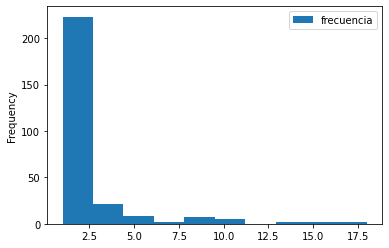

In [20]:
# vamos a hacer el sesgo del salario
# hacemos un histograma para ilustrarlo tambien

salaries = df.groupby('salary')
salaries_freq = salaries.agg(frecuencia = ('salary', 'count'))
salaries_freq.plot.hist()

In [23]:
# vemos que está sesgado hacia la derecha, comprobamos de forma numérica
from scipy.stats import skew
skewness = skew(df['salary'])
skewness

14.018164438483899

In [ ]:
# es un valor positivo y bastante alto, está bastante sesgado hacia la derecha, osea que la mayoria tiene salarios en los rangos más bajo del conjunto de datos.

<AxesSubplot:ylabel='Frequency'>

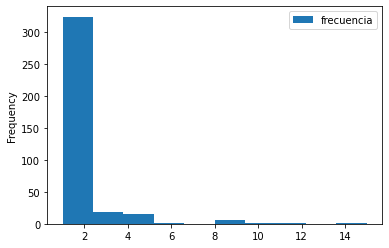

In [29]:
salaries_usd = df.groupby('salary_in_usd')
salaries_freq = salaries.agg(frecuencia = ('salary_in_usd', 'count'))
salaries_freq.plot.hist()

In [30]:
skewness_usd = skew(df['salary_in_usd'])
skewness_usd

1.6634213360977623

In [33]:
df['salary_in_usd'].min()

2859

In [34]:
df['salary_in_usd'].max()

600000

 * Intervalo de confianza de algunas de las variables numéricas del dataset


In [26]:
# lo calculamos y lo comparamos con la media para la variable salary

print(st.t.interval(alpha = 0.95, df = len(df['salary'])-1, loc = np.mean(df['salary']), scale= st.sem(df['salary'])))
print(np.mean(df['salary']))

(200896.72228087025, 447103.40292506054)
324000.0626029654


In [27]:
# lo calculamos y lo comparamos con la media para la variable salary in usd

print(st.t.interval(alpha = 0.95, df = len(df['salary_in_usd'])-1, loc = np.mean(df['salary_in_usd']), scale= st.sem(df['salary_in_usd'])))
print(np.mean(df['salary_in_usd']))

(106641.74701149788, 117953.99269196176)
112297.86985172982



2. Interpretación de los resultados.

 * Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.